# Sentiment Analysis

NLTK has built-in support for dozens of corpora and trained models, we will use a Twitter dataset. This dataset has been manually annotated and serves to establish baselines for models quickly.

## 1. Dataset - Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Trehan\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
# load the text fields of the positive and negative tweets by using the module's strings() method
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


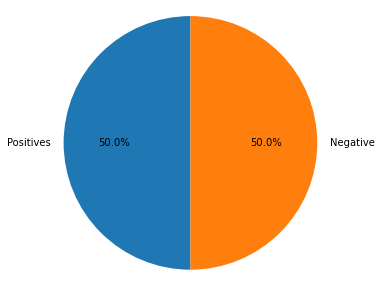

In [5]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

## Looking at raw texts

Below, we see one random positive and one random negative tweet with added color mark at the beginning of the string to further distinguish the two. 

In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Nightly routine of simpin :-)
@JustTakeMeHome_ aw I used the same photo :(


## 2. Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

1. **Tokenizing the string**  
2. **Lowercasing**
3. **Removing stop words and punctuation**
4. **Stemming**

In [7]:
# Above steps need following modules
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming

In [8]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trehan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
print('Before pre-processing: ' + '\033[92m' + tweet)
print('\033[39m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print('After pre-processing: ' + '\033[94m' + tweet2)

Before pre-processing: My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

After pre-processing: My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### 2.1 Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case.

In [11]:
print()
print('\033[92m' + tweet2)

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print('\033[39m')
print('Tokenized string:')
print('\033[94m')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized string:

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### 2.2 Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [12]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

- We can see that the stop words list above contains some words that could be important in some contexts. 
- These could be words like i, not, between, because, won, against. We might need to customize the stop words list for some applications. But for now we will use the entire list.
- For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

In [13]:
print()
print('\033[92m')
print(tweet_tokens)


tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)
print('\033[39m')
print('removed stop words and punctuation:')
print('\033[94m')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


**Note:** Please note that the words happy and sunny in this list are correctly spelled.

### 2.3 Stemming

Stemming is the process of converting a word to its most general form, or stem. **This helps in reducing the size of our vocabulary**.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [14]:
print()
print('\033[92m')
print(tweets_clean)

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('\033[39m')
print('stemmed words:')
print('\033[94m')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### 2.4 Combining above steps in a single fucntion process_tweet()

In [15]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [16]:
# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## 3 Building and Visualizing word frequencies

In [17]:
tweets = all_positive_tweets + all_negative_tweets
# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


- Next, we will build an array of labels that matches the sentiments of our tweets.  
- The `labels` array will be composed of 10000 elements. 
- The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. 

In [18]:
import numpy as np
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
# let's see how many labels we have
print("Number of labels: ", len(labels))

Number of labels:  10000


**💡Tip:** Dictionaries: In Python, a dictionary is a mutable and indexed collection. It stores items as key-value pairs and uses hash tables underneath to allow practically constant time lookups. In NLP, dictionaries are essential because it enables fast retrieval of items or containment checks even with thousands of entries in the collection.

In [19]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

* The outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
* The 'freqs' dictionary is the frequency dictionary that's being built. 
* The key is the tuple (word, label), such as ("happy",1) or ("happy",0).  The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [20]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13173


In [21]:
# print(freqs)

In [22]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

C:\Users\Trehan\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


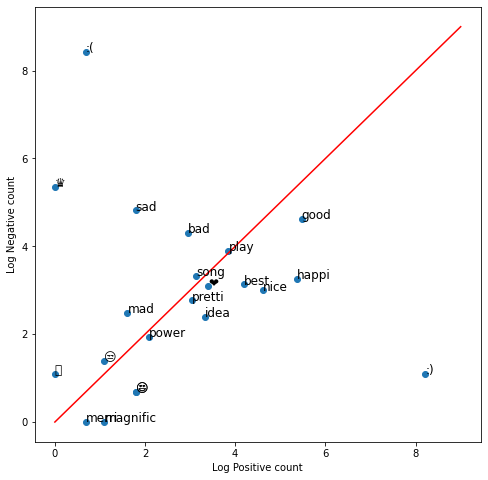

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons :) and :( are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

## 4. Logistic Regression

### 4.1 Splitting the dataset into train and test set

In [24]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [25]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [26]:
# Print the shape train and test sets
print("train_x.shape = " + str(len(train_x)))
print("test_x.shape = " + str(len(test_x)))

train_x.shape = 8000
test_x.shape = 2000


In [27]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


### 4.2 Building word frequency 

In [28]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11430


In [29]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


### 4.3 Sigmoid function

* The sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability. 

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./images/sigmoid_plot.jpg' alt="alternate text" width="width" height="height" style="width:300px;height:200px;" /> Figure 1 </div>

In [30]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
 
    return h

### 4.3 Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

**Regression:**
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights".

**Logistic regression**
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

### Part 4.4 Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of training example 'i'.
* $h(z^{(i)})$ is the model's prediction for the training example 'i'.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label 'y' is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

In [31]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * ((0 * np.log(0.9999)) + (1 - 0) * np.log(1 - 0.9999)) # loss is about 9.2

9.210340371976294

In [32]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * ((1 * np.log(0.0001)) + (1 - 1) * np.log(1 - 0.0001)) # loss is about 9.2

9.210340371976182

### 4.5 Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x^{(i)}_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


### 4.6 Implementing gradient descent function
* The number of iterations 'num_iters" is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are 'm' training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [33]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(X, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))

        # update the weights theta
        theta = theta - (alpha/m)*(np.dot(x.T, (h-y))) 
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

### 4.7 Extracting the features

* Given a list of tweets, extract the features and store them in a matrix. We will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
* Then train your logistic regression classifier on these features.
* Test the classifier on a validation set. 

**Steps:** 
1. This function takes in a single tweet.
2. Process the tweet using the imported `process_tweet` function and save the list of tweet words.
3. Loop through each word in the list of processed words
    1. For each word, check the 'freqs' dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    2. Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)


In [34]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
    
    return x

### 4.8 Training Model

To train the model:
* Stack the features for all training examples into a matrix X. 
* Call `gradientDescent`, which you've implemented above.

In [35]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22522269.
The resulting vector of weights is [6e-08, 0.00053819, -0.0005583]


#### Load a pretrained Logistic Regression model

In [36]:
theta_pretrained = np.squeeze(theta)

**Plot the samples in a scatter plot**  
The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. We have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.

Ignore the bias term, we can plot each tweet in a cartesian plane, using positive_sum and negative_sum. In the cell below, we do precisely this. Additionally, color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

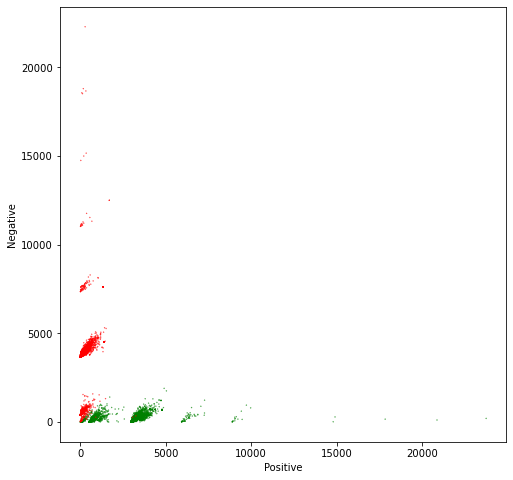

In [37]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in train_y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

**Note:** From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So we can expect a very high accuracy for this model!

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

#### 4.8.1 Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations (neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [38]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights $\theta_1$ and $\theta_2$

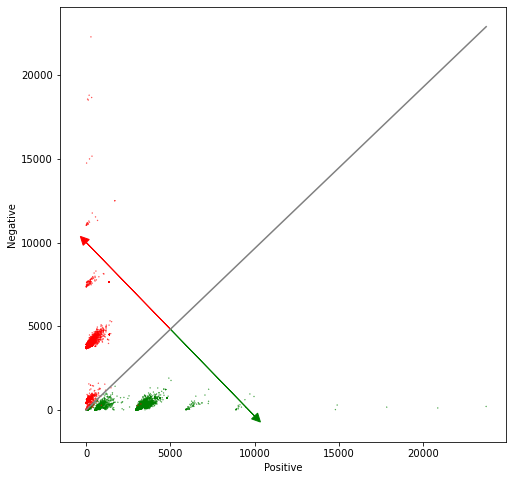

In [39]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in train_y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta_pretrained, 0),   neg(theta_pretrained, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta_pretrained, offset), offset, direction(theta_pretrained, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta_pretrained, offset), -offset, -direction(theta_pretrained, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

### 4.9 Test logistic regression

#### `predict_tweet`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [40]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
   
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

In [41]:
# To test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))    

I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515979
great -> 0.516065
great great -> 0.532096
great great great -> 0.548062
great great great great -> 0.563929


### 4.10 Check performance using the test set

`test_logistic_regression` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* we use 'predict_tweet' function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by m.


In [42]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [43]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


### 4.11 Error Analysis

In [44]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))
        print('----------------------------------------------------------------------------------')

Label Predicted Tweet
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48929436	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
----------------------------------------------------------------------------------
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418961	b"i'm play brain dot braindot"
----------------------------------------------------------------------------------
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418961	b"i

---